In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
#자연어를 처리하는 라이브러리(nltk)
import nltk

#1. 불용어(사용하지 않는 말) 제거
#2. 토크나이즈(자연어를 (특정)단위로 끊는다.)
#3. 어간/표제어 추출
#(다양한 어미로 표현된 자연어를 핵심 의미만 남기는 과정)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

In [3]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
#어간/표제어 추출
lem = WordNetLemmatizer()

words = ['lives', 'dies', 'eats', 'crying']

print(f'표제어 추출 전 : {words}')
print(f'표제어 추출 후 : {[lem.lemmatize(word) for word in words]}')

표제어 추출 전 : ['lives', 'dies', 'eats', 'crying']
표제어 추출 후 : ['life', 'dy', 'eats', 'cry']


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
stopwords_list = stopwords.words('english')
print(f'불용어 개수 : {len(stopwords_list)}')
print(f'불용어 출력 : {stopwords_list[:10]}')

불용어 개수 : 179
불용어 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


## Tf-idf

tf - > 특정 문서(문장) 특정 단어의 등장 횟수

df -> 특정 단어가 등장한 문서(문장)의 수

idf -> df의 역수

tf-idf = 특정 문장에서 특정 단어가 등장한 횟수/ 특정 단어가 등장한 문장의 수

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
#1.불용어
#2.단어의 차원
stop_words = list(stopwords_list)
vect = TfidfVectorizer(stop_words=stop_words, max_features=1000)

## 리뷰데이터 가져와서 정제하기

In [9]:
path = '/content/drive/MyDrive/천안시청 교육과정/데이터/reviews_processed.csv'

In [10]:
df = pd.read_csv(path)

In [11]:
df.head()

,Unnamed: 0,Id,Text
0,0,1,I have bought several of the Vitality canned d...
1,1,2,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,This is a confection that has been around a fe...
3,3,4,If you are looking for the secret ingredient i...
4,4,5,Great taffy at a great price. There was a wid...


In [12]:
data = df[['Text']].iloc[:500].copy()

In [13]:
data.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [14]:
#데이터의 각 행에 불용어 제거, 어간/표제어 추출, 토크나이징 을 수행하기
#위해 하나의 함수로 제작
def clean_text(text):
  #1. 표제어/어간 추출
  le = WordNetLemmatizer()

  #2. 토큰화
  word_tokens = word_tokenize(text)

  tokens=[]
  for w in word_tokens:
    if w not in stop_words and len(w) > 3 :
      temp = le.lemmatize(w.lower()) #upper()
      tokens.append(temp)

  cleaned_text = " ".join(tokens)
  return cleaned_text

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
clean_text("I Like coding.. , Do you like it?")

'like coding like'

In [17]:
#dataframe에 apply는,
#() 안에 있는 함수를 행마다 적용하여 결과값을 내 줌
data['clean'] = data['Text'].apply(clean_text)

In [18]:
data


,Text,clean
0,I have bought several of the Vitality canned d...,bought several vitality canned food product fo...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,This is a confection that has been around a fe...,this confection around century light pillowy c...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price there wide assortment ...
...,...,...
495,i rarely eat chips but i saw these and tried t...,rarely chip tried really amazing love cheddar ...
496,This is easily the best potato chip that I hav...,this easily best potato chip ever look ingredi...
497,Kettle Chips Spicy Thai potato chips have the ...,kettle chip spicy thai potato chip perfect amo...
498,"Okay, I should not eat potato chips, nor shoul...",okay potato chip anyone. spicy would find hard...


### Tf-idf에 clean_text 적용

In [19]:
#1.불용어
#2.단어의 차원
stop_words = list(stopwords_list)
vect = TfidfVectorizer(stop_words=stop_words, max_features=1000)

In [20]:
X = data['clean']
vect_text = vect.fit_transform(X)

In [21]:
vect_text

<500x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 9971 stored elements in Compressed Sparse Row format>

### 특잇값 분해

In [22]:
from sklearn.decomposition import TruncatedSVD

In [23]:
#n_components = 10
svd = TruncatedSVD(n_components=10)

In [24]:
svd_x = vect_text
svd_result = svd.fit_transform(svd_x)

## LDA 모델에 자연어 넣고 분석

In [25]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10)
lda_result = lda_model.fit_transform(vect_text)

#워드 클라우드 그리기

In [26]:
from wordcloud import WordCloud

In [30]:
#자연어 ml모델과, 숫자를 넣으면 해당 모델의 결과를 인쇄
def draw_word_cloud(model, index):

  #워드클라우드에 들어갈 단어
  imp_words_topic=""

  #2가지
  #components = 문장의 특성을 가지고 있음.
  comp = model.components_[index]

  #get_feature_names_out = 단어
  #tf-idf모델.get_feature_names_out
  vocab = vect.get_feature_names_out()

  #vocab_comp = (단어, 특성)
  vocab_comp = zip(vocab, comp)

  #sorted() = 리스트를 정렬해주는 함수
  #key == 리스트를 정렬할 때, 뭘 기준으로 정렬할지/ 여기서는 zip(vocab, comp) >> [1]에 있는 comp
  #reverse=True 내림차순(큰 것부터 앞으로)
  #[:25] 큰 순서대로 25개까지
  sorted_word = sorted(vocab_comp, key=lambda x:x[1], reverse=True)[:25]
  print(sorted_word)

  for word in sorted_word:
    imp_words_topic=imp_words_topic+" "+word[0]
    # ' '.join(word[0])

  wordcloud = WordCloud(width=900, height=600).generate(imp_words_topic)
  plt.figure(figsize=(5, 5))
  plt.imshow(wordcloud)

[('ramen', 1.689088770891448), ('delivered', 1.1390701471788385), ('taste', 1.1340204844345283), ('door', 1.0405561816426292), ('order', 1.0201306513112542), ('delicious', 0.9389698584484287), ('good', 0.9207993744391968), ('christmas', 0.8736209432832328), ('diet', 0.8394904951725304), ('tuna', 0.8324234255986138), ('right', 0.8000985489923881), ('town', 0.7807556777195288), ('light', 0.7464224937297332), ('shipping', 0.7416328952458978), ('actually', 0.737468251187572), ('finish', 0.7366798171614389), ('husband', 0.7337808619580181), ('tiny', 0.7124543760061112), ('bag', 0.6842046335101771), ('highly', 0.6778977329801793), ('strawberry', 0.6547778683297941), ('sister', 0.6324883859958436), ('decided', 0.6186684223392855), ('meaning', 0.6162083065635474), ('le', 0.6154442801564625)]


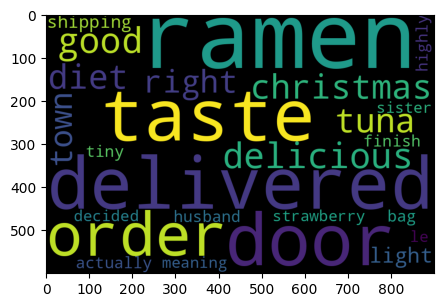

In [31]:
draw_word_cloud(lda_model, 7)

[('ramen', 1.689088770891448), ('delivered', 1.1390701471788385), ('taste', 1.1340204844345283), ('door', 1.0405561816426292), ('order', 1.0201306513112542), ('delicious', 0.9389698584484287), ('good', 0.9207993744391968), ('christmas', 0.8736209432832328), ('diet', 0.8394904951725304), ('tuna', 0.8324234255986138), ('right', 0.8000985489923881), ('town', 0.7807556777195288), ('light', 0.7464224937297332), ('shipping', 0.7416328952458978), ('actually', 0.737468251187572), ('finish', 0.7366798171614389), ('husband', 0.7337808619580181), ('tiny', 0.7124543760061112), ('bag', 0.6842046335101771), ('highly', 0.6778977329801793), ('strawberry', 0.6547778683297941), ('sister', 0.6324883859958436), ('decided', 0.6186684223392855), ('meaning', 0.6162083065635474), ('le', 0.6154442801564625)]


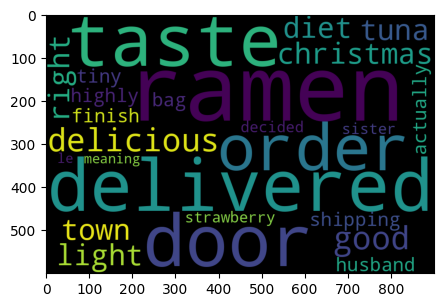

In [32]:
draw_word_cloud(lda_model, 7)

[('ramen', 1.689088770891448), ('delivered', 1.1390701471788385), ('taste', 1.1340204844345283), ('door', 1.0405561816426292), ('order', 1.0201306513112542), ('delicious', 0.9389698584484287), ('good', 0.9207993744391968), ('christmas', 0.8736209432832328), ('diet', 0.8394904951725304), ('tuna', 0.8324234255986138), ('right', 0.8000985489923881), ('town', 0.7807556777195288), ('light', 0.7464224937297332), ('shipping', 0.7416328952458978), ('actually', 0.737468251187572), ('finish', 0.7366798171614389), ('husband', 0.7337808619580181), ('tiny', 0.7124543760061112), ('bag', 0.6842046335101771), ('highly', 0.6778977329801793), ('strawberry', 0.6547778683297941), ('sister', 0.6324883859958436), ('decided', 0.6186684223392855), ('meaning', 0.6162083065635474), ('le', 0.6154442801564625)]


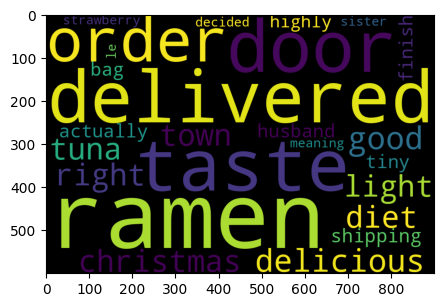

In [33]:
draw_word_cloud(lda_model, 7)

In [39]:
data.iloc[:][1:6]

,Text,clean
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,This is a confection that has been around a fe...,this confection around century light pillowy c...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price there wide assortment ...
5,I got a wild hair for taffy and ordered this f...,wild hair taffy ordered five pound taffy enjoy...


[('good', 4.118085335019123), ('love', 3.8895462067152415), ('sauce', 2.9643942292726884), ('great', 2.9282637839588865), ('little', 2.805622280767225), ('product', 2.5620585467447814), ('best', 2.509457389443982), ('coffee', 2.3614421038920264), ('flavor', 2.2322529464601555), ('would', 2.010216957233804), ('price', 1.962340515419895), ('like', 1.9064496971544846), ('arrived', 1.8800899127525719), ('husband', 1.8621508148155401), ('quality', 1.8485704119525448), ('taste', 1.8465271193455048), ('version', 1.8376986502354462), ('okay', 1.7682196463442053), ('salsa', 1.7496357436156706), ('shipping', 1.7389031133444337), ('many', 1.6682898410704854), ('ginger', 1.6545526501023282), ('item', 1.6395533890383664), ('also', 1.6346949177269376), ('amazon', 1.6208707093149841)]


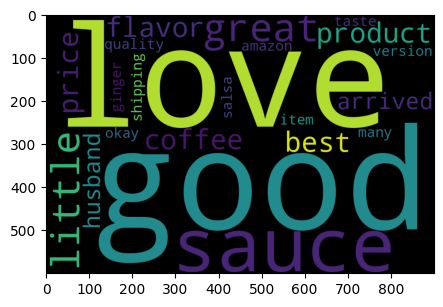

In [40]:
draw_word_cloud(lda_model, 3)

[('good', 4.118085335019123), ('love', 3.8895462067152415), ('sauce', 2.9643942292726884), ('great', 2.9282637839588865), ('little', 2.805622280767225), ('product', 2.5620585467447814), ('best', 2.509457389443982), ('coffee', 2.3614421038920264), ('flavor', 2.2322529464601555), ('would', 2.010216957233804), ('price', 1.962340515419895), ('like', 1.9064496971544846), ('arrived', 1.8800899127525719), ('husband', 1.8621508148155401), ('quality', 1.8485704119525448), ('taste', 1.8465271193455048), ('version', 1.8376986502354462), ('okay', 1.7682196463442053), ('salsa', 1.7496357436156706), ('shipping', 1.7389031133444337), ('many', 1.6682898410704854), ('ginger', 1.6545526501023282), ('item', 1.6395533890383664), ('also', 1.6346949177269376), ('amazon', 1.6208707093149841)]


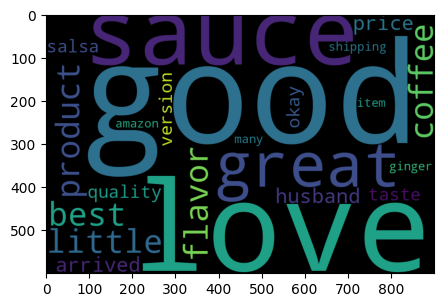

In [41]:
draw_word_cloud(lda_model, 3)

[('good', 4.118085335019123), ('love', 3.8895462067152415), ('sauce', 2.9643942292726884), ('great', 2.9282637839588865), ('little', 2.805622280767225), ('product', 2.5620585467447814), ('best', 2.509457389443982), ('coffee', 2.3614421038920264), ('flavor', 2.2322529464601555), ('would', 2.010216957233804), ('price', 1.962340515419895), ('like', 1.9064496971544846), ('arrived', 1.8800899127525719), ('husband', 1.8621508148155401), ('quality', 1.8485704119525448), ('taste', 1.8465271193455048), ('version', 1.8376986502354462), ('okay', 1.7682196463442053), ('salsa', 1.7496357436156706), ('shipping', 1.7389031133444337), ('many', 1.6682898410704854), ('ginger', 1.6545526501023282), ('item', 1.6395533890383664), ('also', 1.6346949177269376), ('amazon', 1.6208707093149841)]


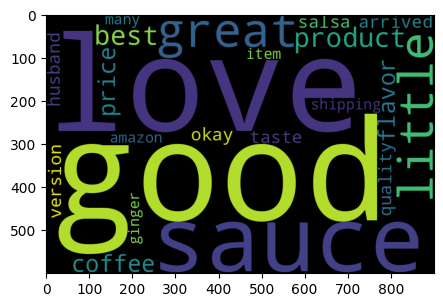

In [42]:
draw_word_cloud(lda_model, 3)

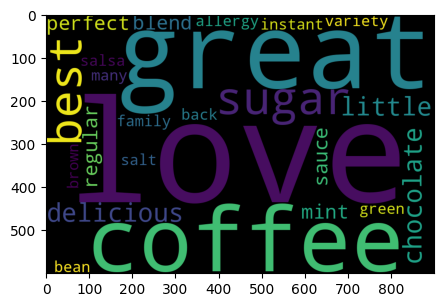

In [29]:
draw_word_cloud(svd, 7)